In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from obspy.taup import TauPyModel
import function_repo as fr
import importlib
importlib.reload(fr)
np.random.seed(1029)

In [71]:
# load normal-fault-guess.csv as a dataframe
df = pd.read_csv("rigid_rand_normal.csv")
df.head()

Theta   Phi        tx        ty   tz        px        py        pz  \
0  266.086957  60.0 -0.059100 -0.864006  0.5 -0.341156  0.488199  0.803290   
1  267.826087  60.0 -0.032851 -0.865402  0.5 -0.353991  0.477915  0.803920   
2  269.565217  60.0 -0.006572 -0.866000  0.5  0.362567 -0.468051 -0.805899   
3  269.565217  60.0 -0.006572 -0.866000  0.5  0.386838 -0.463284 -0.797324   
4  271.304348  60.0  0.019714 -0.865801  0.5  0.349135 -0.462653 -0.814897   

         AP       ASV       ASH     Strike1       Dip1       Rake1  \
0 -0.003013 -0.014407  0.007341  136.804356  22.844031  -33.532423   
1 -0.002948 -0.014318  0.007224  134.952270  22.778178  -33.715629   
2 -0.002903 -0.014229  0.007072  255.058641  77.507989 -108.950235   
3 -0.002782 -0.014106  0.007268  254.035858  77.863613 -110.229063   
4 -0.002967 -0.014220  0.006744  254.482578  77.134349 -107.500246   

      Strike2       Dip2       Rake2  OldWeight    Weight  
0  258.217640  77.616251 -109.349030   0.163039  0.183373  
1  256.554931  77.590111 -109.253540   0.212289  0.231546  
2  132.849029  22.570155  -34.302546   0.281506  0.261277  
3  134.330192  23.458843  -31.878532   0.176396  0.369779  
4  129.253036  21.600622  -37.217946   0.405314  0.153982

In [72]:
# weight is np.exp(-angle**2/(2*epsilon**2))

old_accepted1 = df["OldWeight"] >= np.exp(-1/2)
old_accepted2 = (df["OldWeight"] >= np.exp(-2)) & (df["OldWeight"] < np.exp(-1/2))
old_rejected = df["OldWeight"] < np.exp(-2)
accepted1 = df["Weight"] >= np.exp(-1/2)
accepted2 = (df["Weight"] >= np.exp(-2)) & (df["Weight"] < np.exp(-1/2))
rejected = df["Weight"] < np.exp(-2)

if len(df[rejected]) == 0:
    print("No rejected solutions")

No rejected solutions


In [58]:
# Plot the accepted and rejected guesses in 3D scatter plot
# Then plot pairwaise scatter plot of the accepted guesses
# Then beachballs of the accepted guesses, accounting for weight

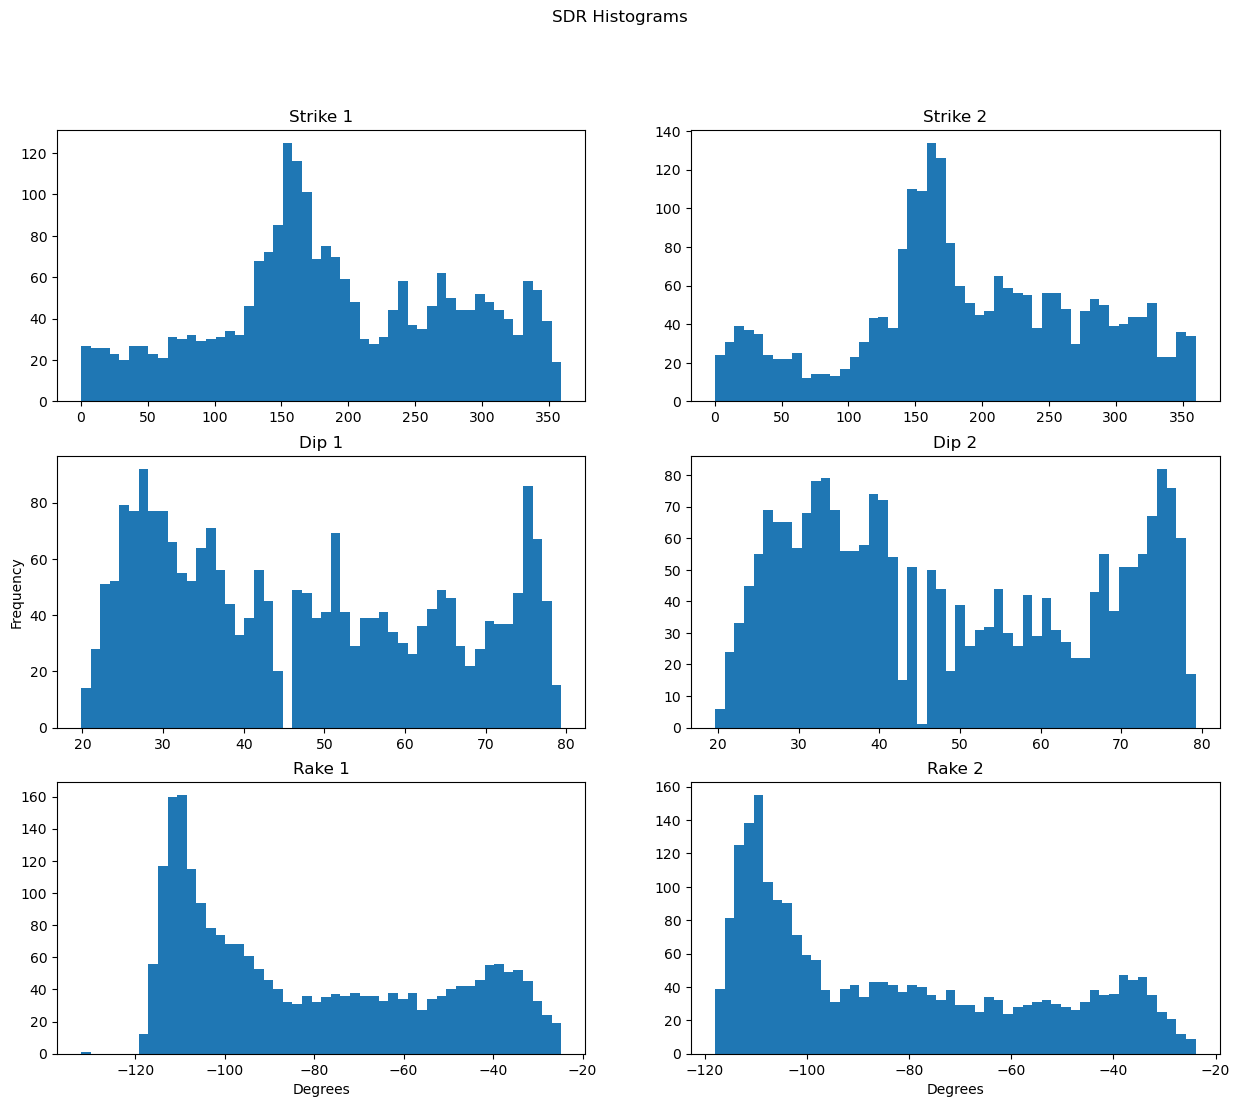

In [73]:
# histogram (sanity check)
fr.sdr_histograms(df)
# fr.sdr_histograms(df[(df["Strike1"]>140) & (df["Strike1"]<250)])
# overlay histograms of accepted/rejected guesses

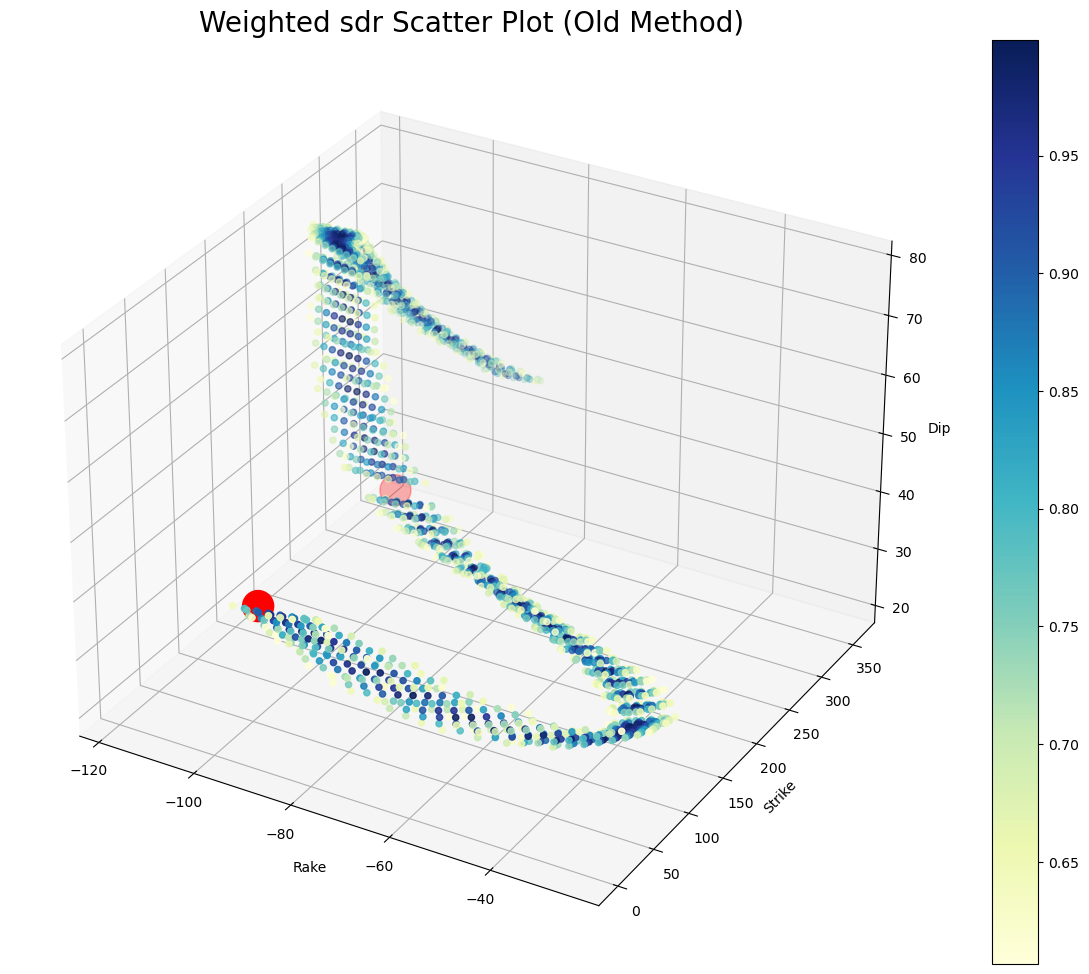

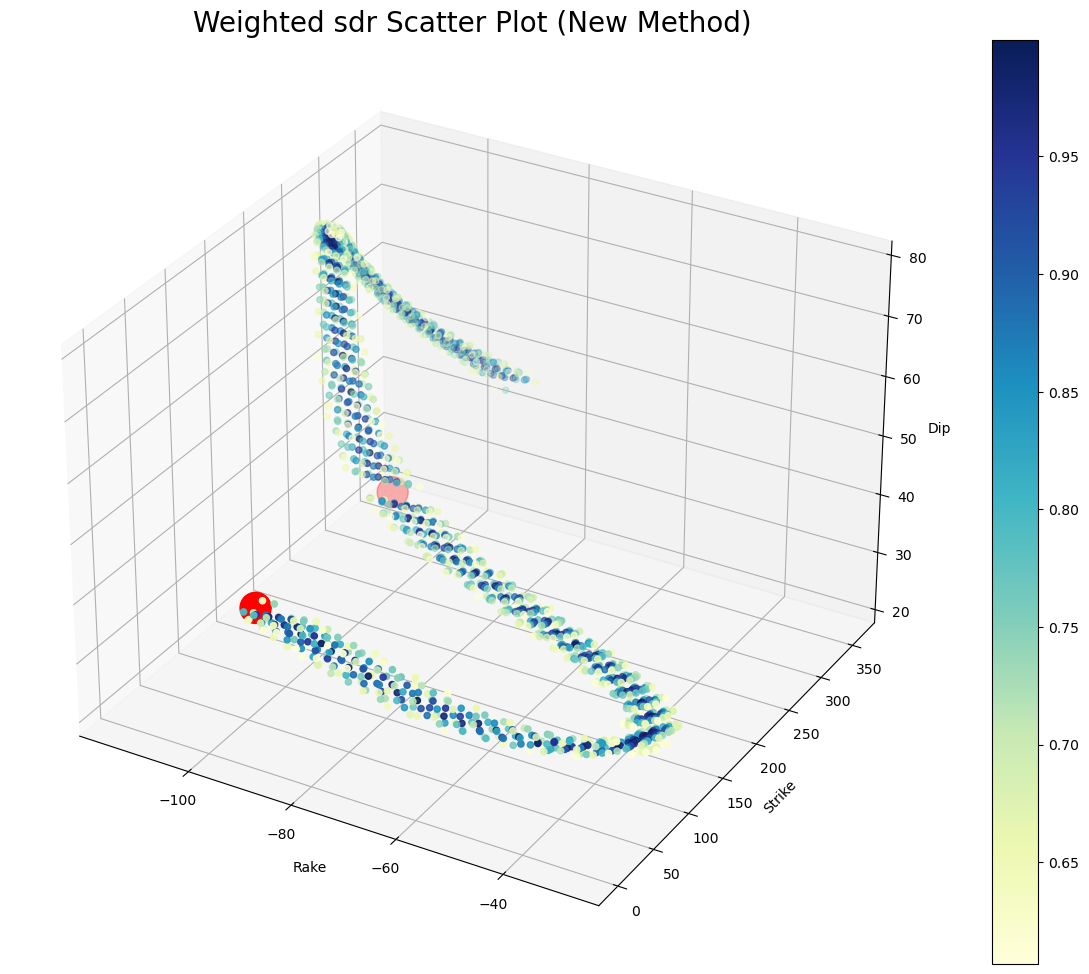

In [74]:
# 3D sdr scatter plot

# Ao = np.array([-0.81021954, -4.91714978, 2.19851802])
# Uo = np.array([0.02231451, 0.13542476, 0.06055007])
t, p = np.array([1,0,0]), np.array([0,0,1])
normal_faults = fr.tp2sdr(fr.coord_switch(t), fr.coord_switch(p))
normal_faults = np.rad2deg(np.array(normal_faults))

fr.weighted_3D_scatter(df[old_accepted1], "OldWeight", normal_faults)
fr.weighted_3D_scatter(df[accepted1], "Weight", normal_faults)

In [61]:
# Explain the S-shape
# The red circles seem to be in the middle of the paths they came from
# Compare with weighted average

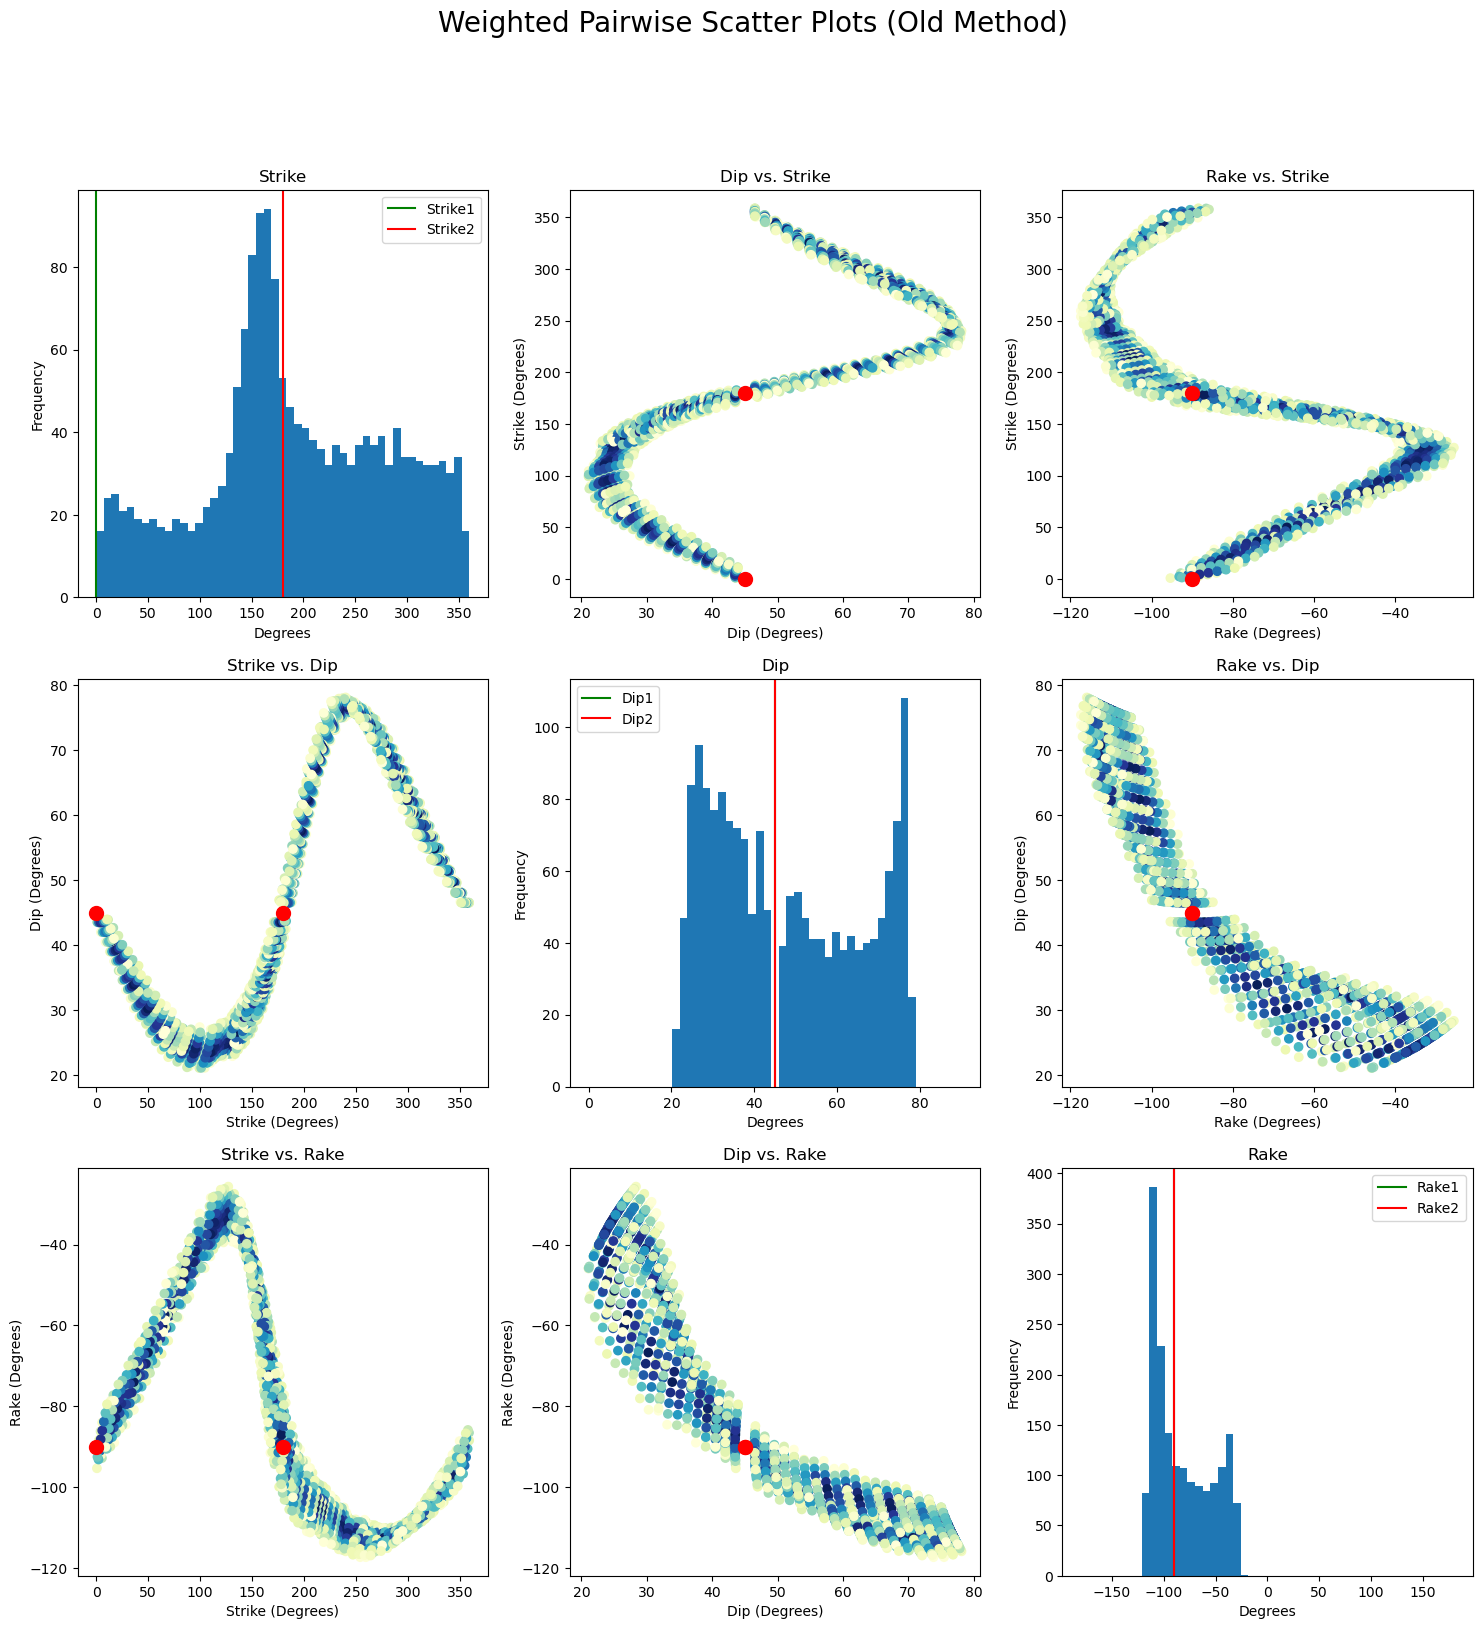

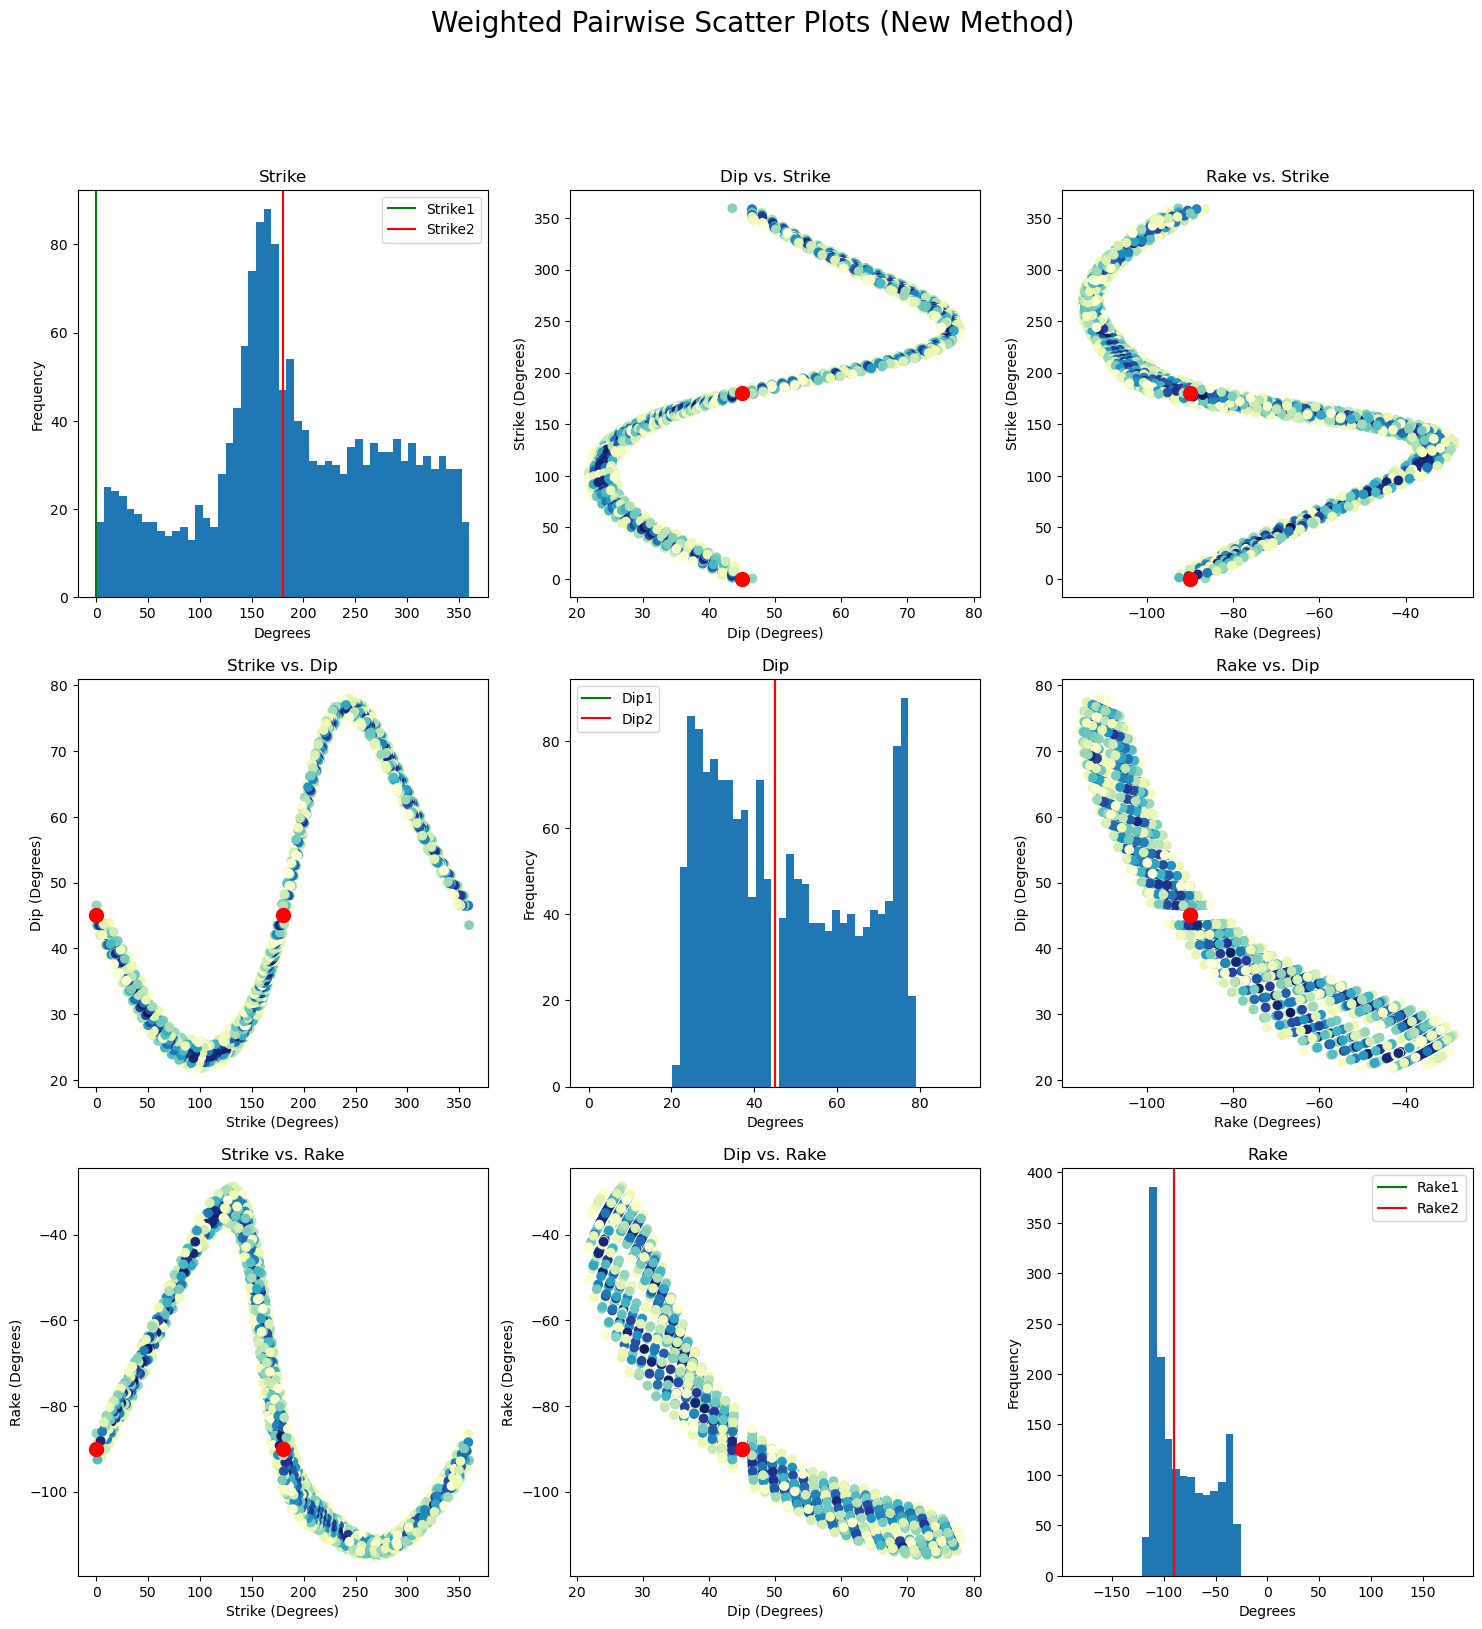

In [75]:
# Grid of pairwise scatter plots
fr.weighted_pairwise_scatter(df[old_accepted1], "OldWeight", true_sol = normal_faults)
fr.weighted_pairwise_scatter(df[accepted1], "Weight", true_sol = normal_faults)

# marker for true soln in histogram

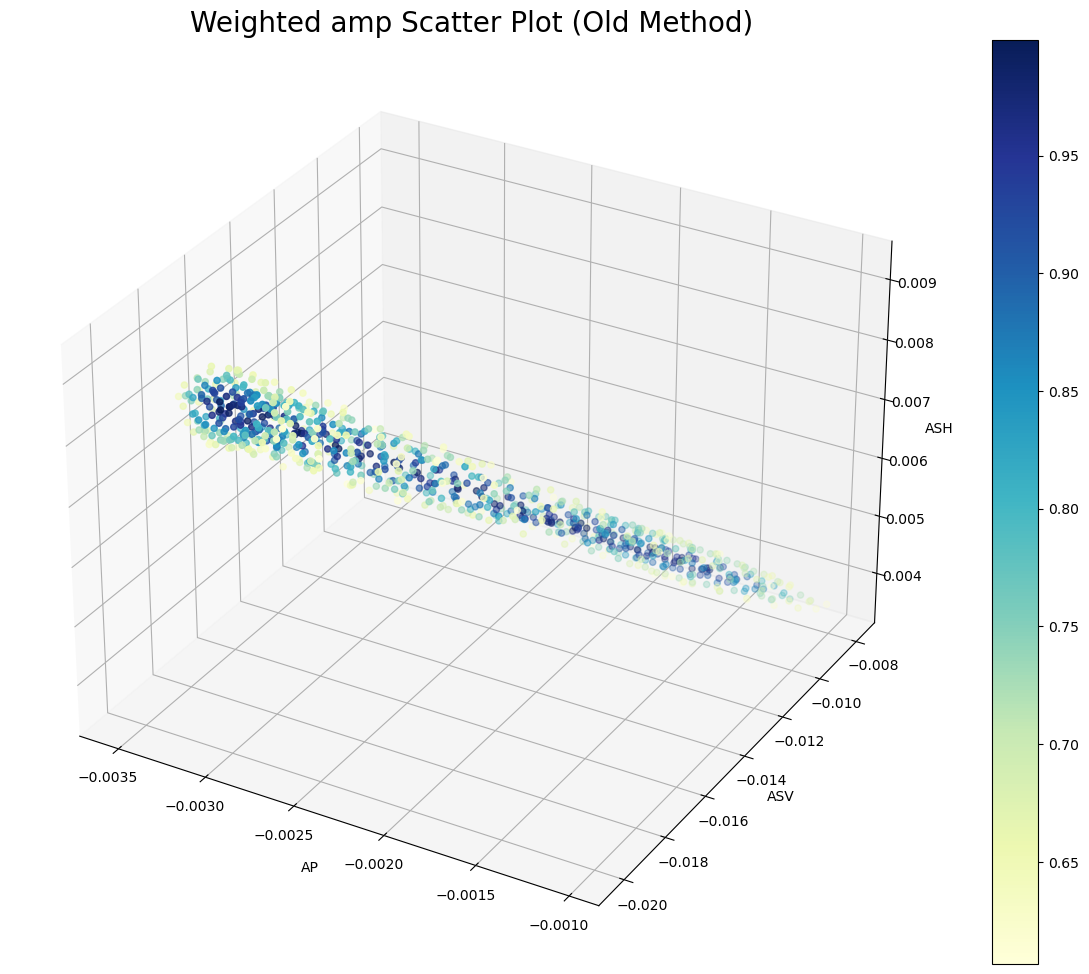

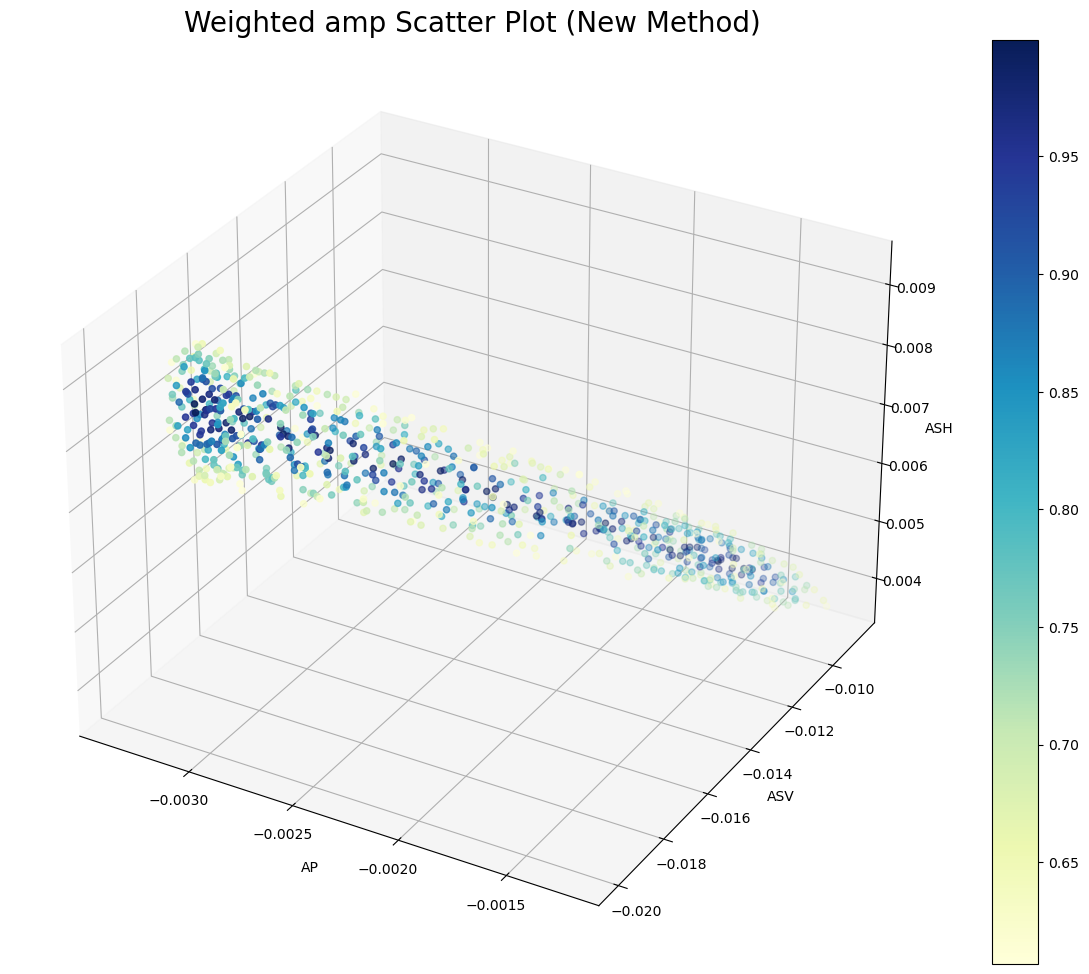

In [77]:
fr.weighted_3D_scatter(df[old_accepted1], "OldWeight", type = "amp")
fr.weighted_3D_scatter(df[accepted1], "Weight", type = "amp")

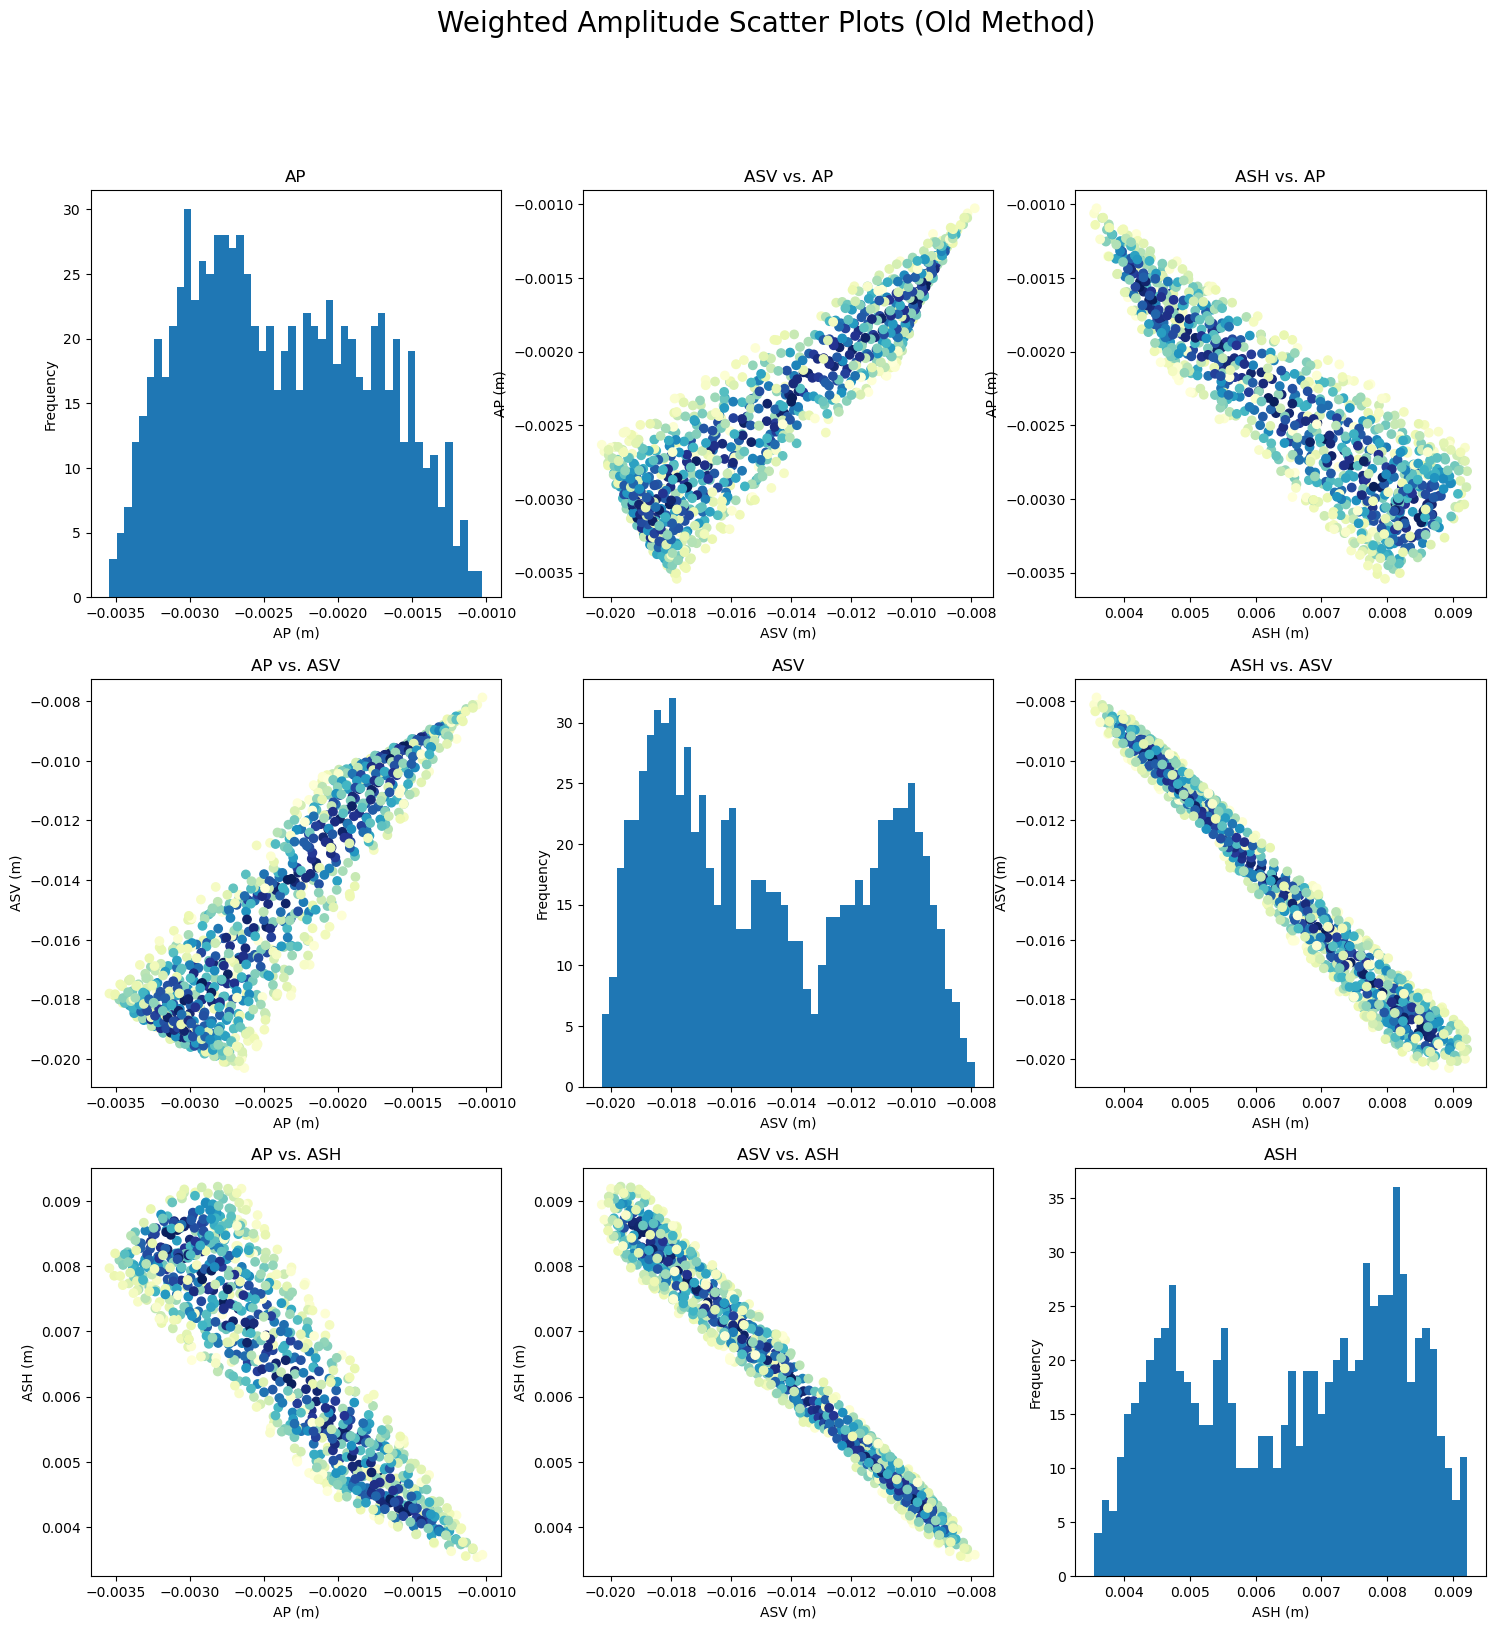

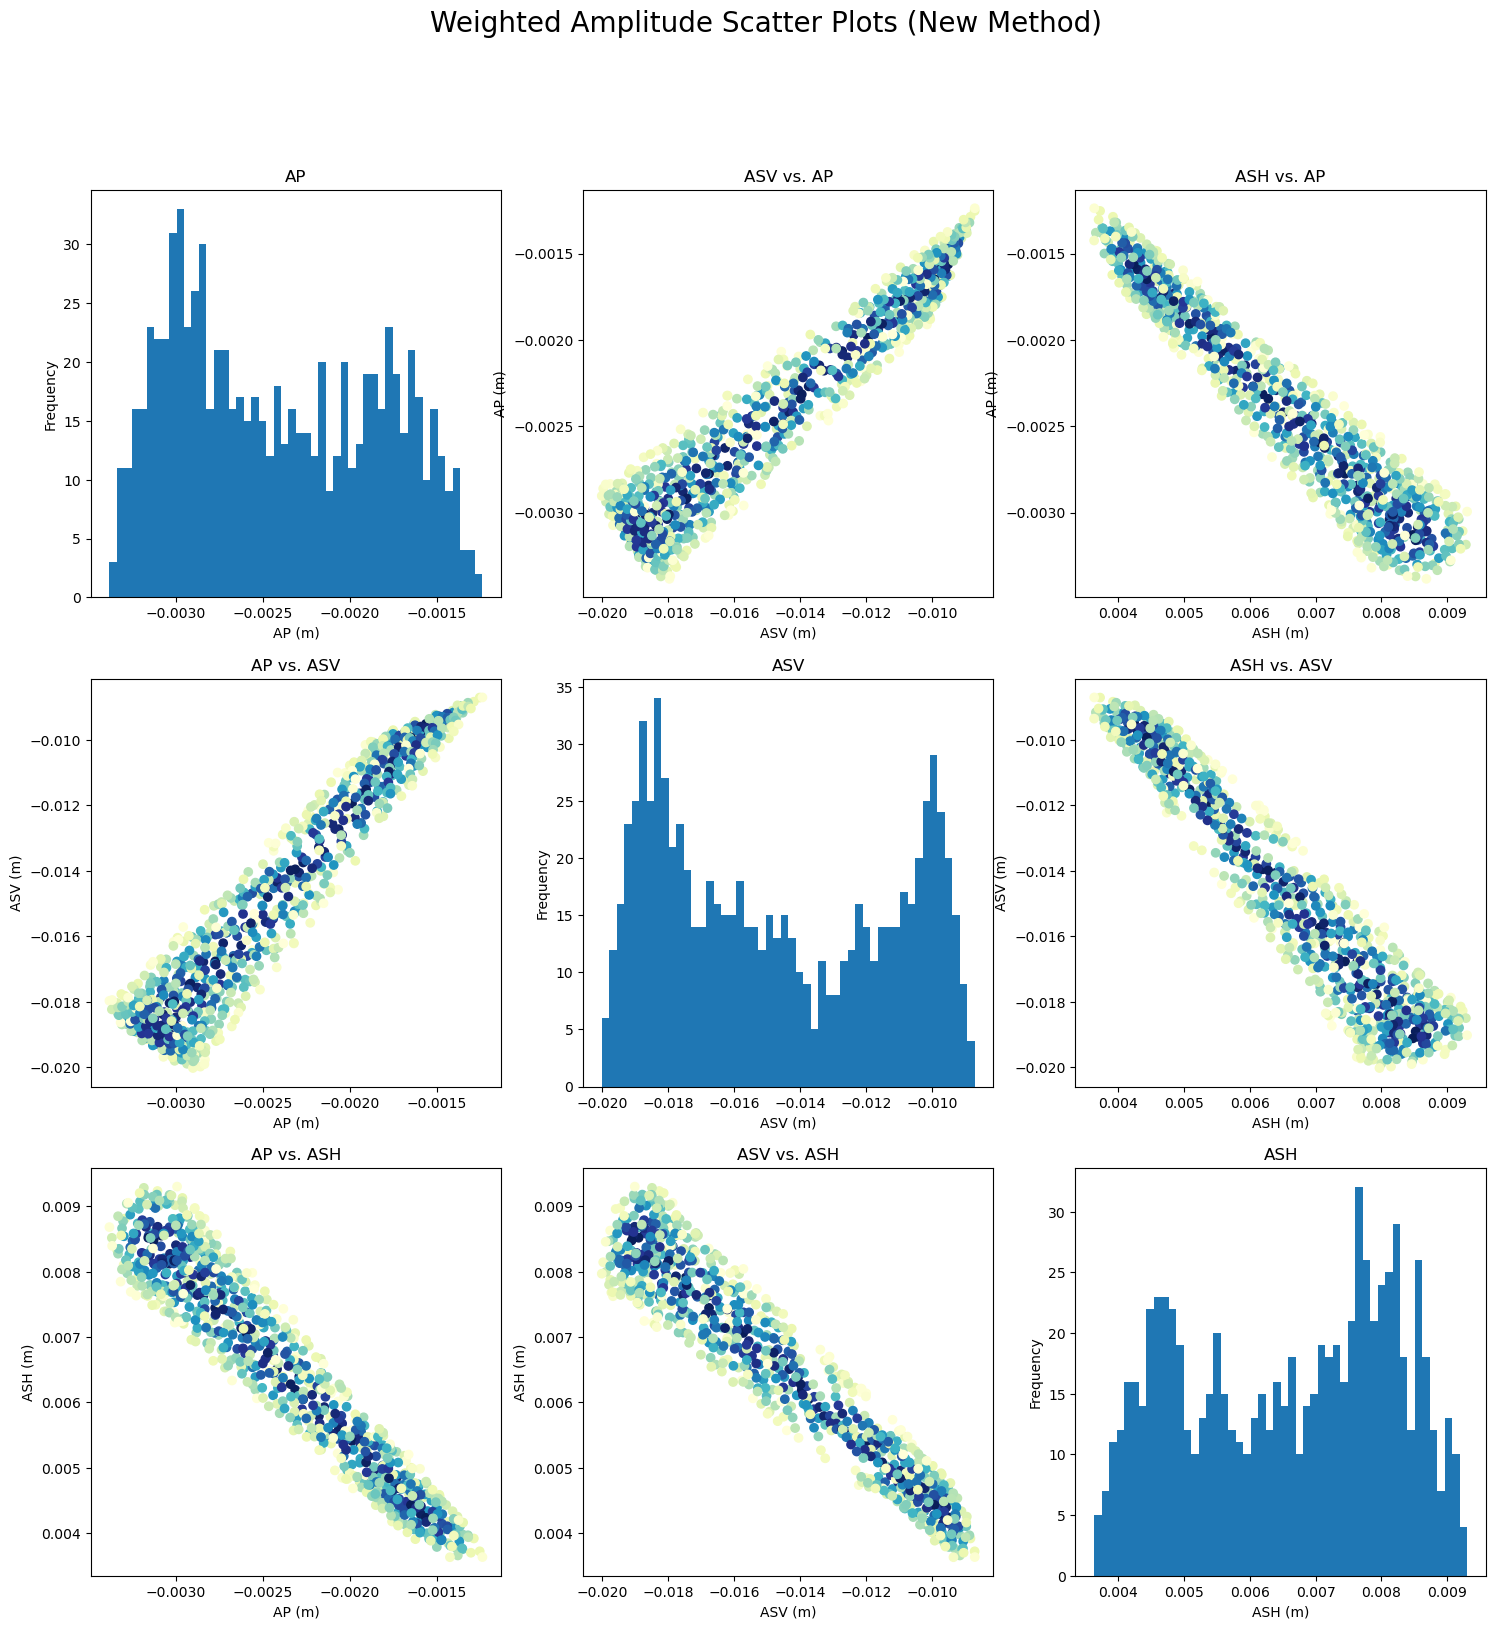

In [81]:
importlib.reload(fr)
fr.weighted_pairwise_scatter(df[old_accepted1], "OldWeight", type = "amp")
fr.weighted_pairwise_scatter(df[accepted1], "Weight", type = "amp")

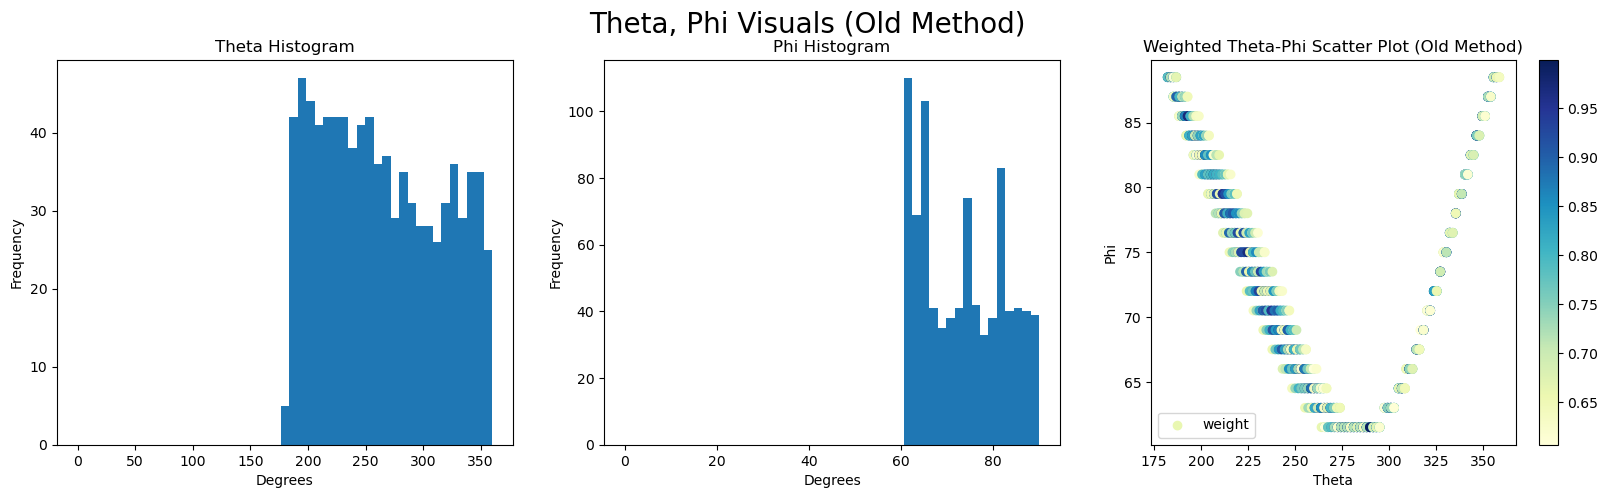

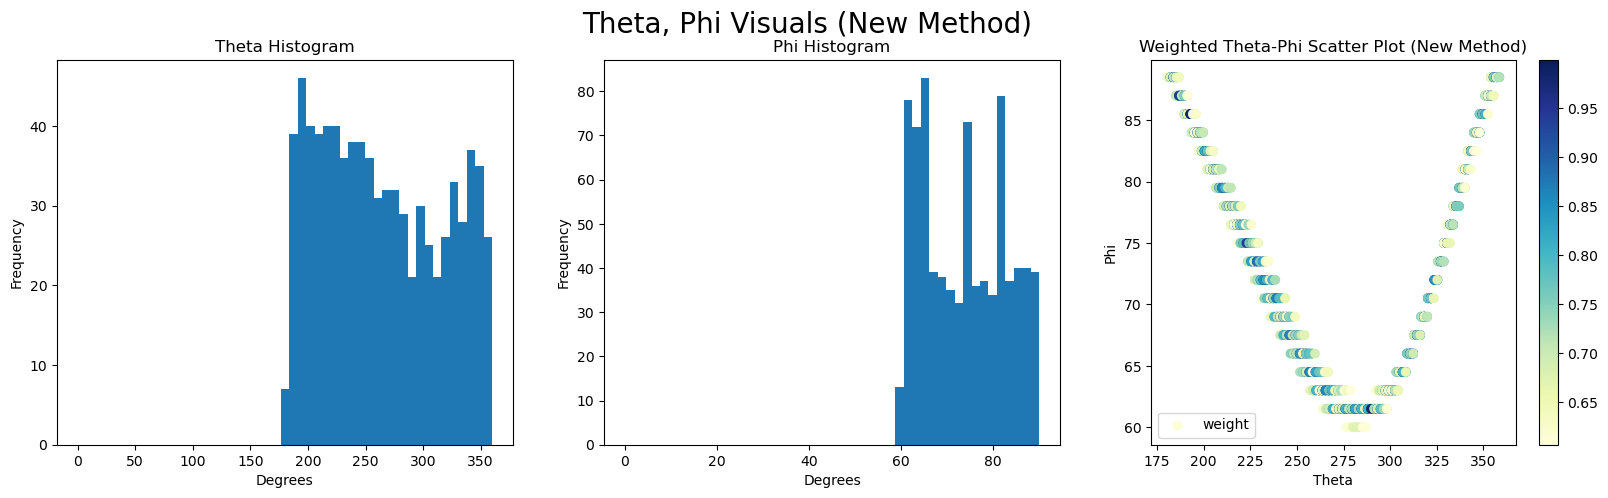

In [78]:
# grid of pairwise scatter plots
fr.weighted_pairwise_scatter(df[old_accepted1], "OldWeight", type="tp")
fr.weighted_pairwise_scatter(df[accepted1], "Weight", type="tp")

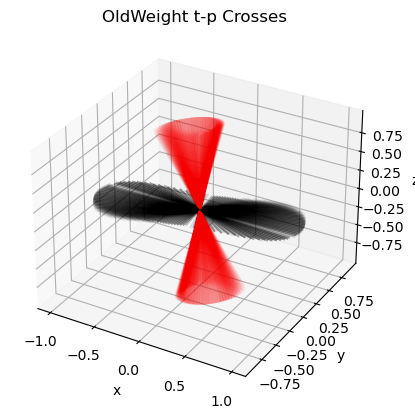

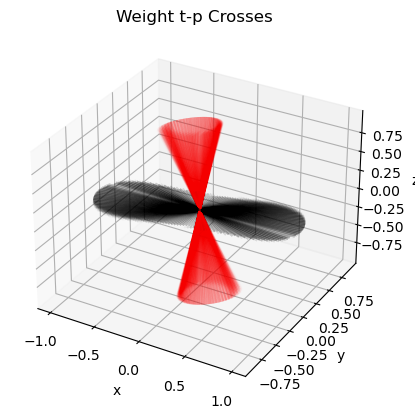

In [79]:
# TP CROSSES

fr.plot_crosses(df[old_accepted1], "OldWeight")
fr.plot_crosses(df[accepted1], "Weight")

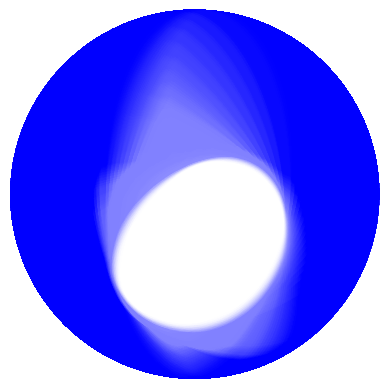

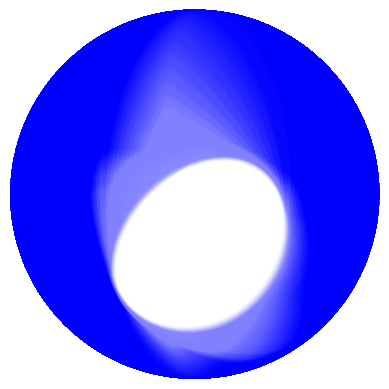

In [82]:
# COMPLETE SOLUTION SETS

fr.plot_beachball_set(df[old_accepted1], "OldWeight")
fr.plot_beachball_set(df[accepted1], "Weight")

Original: [  0.  45. -90.]


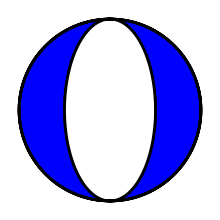

Old SDR (1 stdev): [192.95578676  48.00578953 -82.04417613]


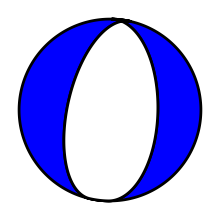

SDR (1 stdev): [192.22111563  47.19828931 -81.41353449]


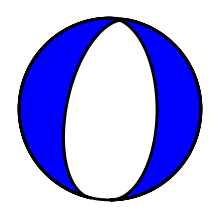

Old SDR (2 stdevs): [192.3186658   46.97263092 -80.92431111]


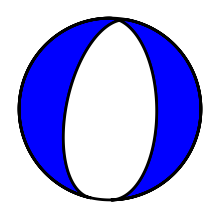

SDR (2 stdevs): [191.00074517  47.54045484 -81.07339506]


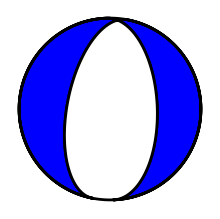

In [83]:
# AGGREGATE BEACHBALLS

print(f"Original: {normal_faults[0]}")
fr.beachball(normal_faults[0]);

old_sdr_1s = fr.aggregate_sdr(df[old_accepted1], "OldWeight")[0]
print(f"Old SDR (1 stdev): {old_sdr_1s}")
fr.beachball(old_sdr_1s);
sdr_1s = fr.aggregate_sdr(df[accepted1], "Weight")[0]
print(f"SDR (1 stdev): {sdr_1s}")
fr.beachball(sdr_1s);

old_sdr_2s = fr.aggregate_sdr(df[old_accepted2], "OldWeight")[0]
print(f"Old SDR (2 stdevs): {old_sdr_2s}")
fr.beachball(old_sdr_2s);
sdr_2s = fr.aggregate_sdr(df[accepted2], "Weight")[0]
print(f"SDR (2 stdevs): {sdr_2s}")
fr.beachball(sdr_2s);

In [84]:
# AGGREGATE MISFIT ANGLES

model = TauPyModel(model='ak135') # velocity model
hdepth = 15 # km - assumed quake depth
epdist = 10
b3_over_a3 = (3.4600/5.8000)**3
azimuth = 200

t, p = np.array([1,0,0]), np.array([0,0,1])
faults = fr.tp2sdr(fr.coord_switch(t), fr.coord_switch(p))
faults = np.rad2deg(np.array(faults))
arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['P', 'S'])
takeoff_angles = [a.takeoff_angle for a in arrivals]
Ao = np.array(fr.Rpattern(faults[0], azimuth, takeoff_angles))
Ao[0] *= b3_over_a3

old_As1 = np.array(fr.Rpattern(old_sdr_1s, azimuth, takeoff_angles))
old_As1[0] *= b3_over_a3
old_angle_1s = np.arccos(np.dot(old_As1, Ao)/(np.linalg.norm(old_As1)*np.linalg.norm(Ao)))
print(f"Old angle (1 stdev): {np.rad2deg(old_angle_1s): .3f} degrees, sample size: {len(df[old_accepted1])}")

As1 = np.array(fr.Rpattern(sdr_1s, azimuth, takeoff_angles))
As1[0] *= b3_over_a3
angle_1s = np.arccos(np.dot(As1, Ao)/(np.linalg.norm(As1)*np.linalg.norm(Ao)))
print(f"New angle (1 stdev): {np.rad2deg(angle_1s): .3f} degrees, sample size: {len(df[accepted1])}")

old_As2 = np.array(fr.Rpattern(old_sdr_2s, azimuth, takeoff_angles))
old_As2[0] *= b3_over_a3
old_angle_2s = np.arccos(np.dot(old_As2, Ao)/(np.linalg.norm(old_As2)*np.linalg.norm(Ao)))
print(f"Old angle (2 stdevs): {np.rad2deg(old_angle_2s): .3f} degrees, sample size: {len(df[old_accepted2])}")

As2 = np.array(fr.Rpattern(sdr_2s, azimuth, takeoff_angles))
As2[0] *= b3_over_a3
angle_2s = np.arccos(np.dot(As2, Ao)/(np.linalg.norm(As2)*np.linalg.norm(Ao)))
print(f"New angle (2 stdevs): {np.rad2deg(angle_2s): .3f} degrees, sample size: {len(df[accepted2])}")

Old angle (1 stdev):  2.888 degrees, sample size: 867
New angle (1 stdev):  2.847 degrees, sample size: 805
Old angle (2 stdevs):  2.950 degrees, sample size: 1431
New angle (2 stdevs):  3.471 degrees, sample size: 1493


In [68]:
# Try Kagan angles <<<<

# Look at more source mechanisms, maybe it's better over the entire space
# What if it depends on how many solutions are accepted?
# Try comparing an equal number of solutions, just weighted differently
# What if we got aggregate of the whole thing? (efficiency tradeoff)
# New dataframe with the info from previous cell, look at research papers
# Make a function that returns final dataframe given all input parameters

In [69]:
# beachballs, consider weight
# omkar's code (GitHub)
# proper labelling of previous graphs

# amplitude space (generate data, plot) categorizing breadth vs depth
# consider smaller errors, see how close you can get
# sensitivity analysis of errors**
# overlay histograms of accepted/rejected guesses
# tp crosses on sphere
# collapsing dimensions in space
# same mechanism, different azimuths/epicentral depths
# map from sdr to amplitudes
# in what ways can I visualize parts of this data?
# what variables to vary?
    # azimuth, epicentral depth, takeoff angle, amplitude, uncertainty
# coarse subdivisions of space
# KEEP THE BALL MOVING!

# fix b3_over_a3 in fr.apply_inverse_methods (just notational)

# working with seeds

# STATISTICAL METHODS
# 1. Hypothesis testing
# 2. Inference from samples
# 3. Estimation of parameters
# 4. Predictive regression/methods
# 5. Potential machine learning methods
# 6. Collapsing dimensions in space
# 7. Sensitivity analysis of errors - how close can I get?

# GET RELEVANT PAPERS, ASK SUZAN AS WELL
# 1. Maddy's paper
# 2. The one I used for ellipsoidal projections
# 3. Matthew Plumlee - uncertainty quantification, model calibration, large scale simulations
# 4. Elliptical slice sampling, learn more about it
# 5. Textbooks (statistical methods)

# I NEED A SYSTEM FOR GETTING FROM HERE TO A FIRST DRAFT

### Model comparisons

* What metrics can we use?
* Different ways of weighting
* Are s,d,r dependent?
* If not, to what extent does ... account for the dependencies?